# 1. Imports and Configuration

## 1.1. Libraries and modules imported

Libraries importer:
* **padas**: Dataframe manipulation
* **numpy**: Matrix computations
* **seaborn**: Visualization library
* **matplotlib.pyplot**: Plotting library
* **urllib** imports: Dealing with url requests (for data reading)

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from urllib.request import Request, urlopen

import operator
import math
import random

# Generate a custom diverging colormap (used for seaborn heatmaps)
cmap = sns.diverging_palette(255, 0, as_cmap=True)

# 2. Recovering the data
Notice that the datasets are loaded directly from the web. The links for the data are available in our paper and were found from other papers using the dataset. We provide no warranties or conditions of any kind to the availability of these datasets.

## 2.1 Dealing with HTTP Error 403
Some website tries to prevent content scraping. In order to overcome the scraping protection, we used a different http request header, defined inside the function read_csv_from_web

In [7]:
def read_csv_from_web(url, sep=',', header='infer'):
    headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36' 
                         '(KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36', 
                'Referer': 'https://www.nseindia.com', 
               'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'}
    url_request  = Request(url, headers = headers)
    return pd.read_csv(urlopen(url_request), sep = sep, header = header)

## 2.2 URL for the data
These links were recovered from the papers and were active on the date we executed this scrip.

In [8]:
data_urls = {'towerData' : "http://symbolicregression.com/sites/default/files/DataSets/towerData.txt",
             'toxicity' : "http://personal.disco.unimib.it/Vanneschi/toxicity.txt",
             'CCun' : "http://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt",
             'CCn' : "http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data",
             'DLBCL' : "https://llmpp.nih.gov/DLBCL/DLBCL_patient_data_NEW.txt"
            }

## 3.1 Communities and Crime (CCun and CCn)
These datasets are used in the paper "*Feature Selection to Improve Generalization of Genetic Programming for High-Dimensional Symbolic Regression*". The authors applied some pre-processing to the data before using in their experiemnts (this information was obtained directly from the authors, since it is not present in the paper):
1. Discard the first 5 features, since they are non-predictive features.
2. From the 18 potential goal/target, we use only the “ViolentCrimesPerPop” and discard the other 17 features (only for the unnormalized version).
3. Discard the instances where the target value is missing.
4. Use a simple imputation method (set the missing value to be the mean value of the feature) for instances where the feature values are missing,


In [84]:
df_ccun = read_csv_from_web(data_urls['CCun'], header=None)
df_ccn = read_csv_from_web(data_urls['CCn'], header=None)

In [75]:
# Column names, obtained from 'http://archive.ics.uci.edu/ml/datasets/communities+and+crime+unnormalized'
col_names_ccun = ["communityname", "state", "countyCode", "communityCode", "fold",
                  "population", "householdsize", "racepctblack", "racePctWhite",
                  "racePctAsian", "racePctHisp", "agePct12t21", "agePct12t29",
                  "agePct16t24", "agePct65up", "numbUrban", "pctUrban", "medIncome",
                  "pctWWage", "pctWFarmSelf", "pctWInvInc", "pctWSocSec", "pctWPubAsst",
                  "pctWRetire", "medFamInc", "perCapInc", "whitePerCap", "blackPerCap", 
                  "indianPerCap", "AsianPerCap", "OtherPerCap", "HispPerCap",
                  "NumUnderPov", "PctPopUnderPov", "PctLess9thGrade", "PctNotHSGrad",
                  "PctBSorMore", "PctUnemployed", "PctEmploy", "PctEmplManu",
                  "PctEmplProfServ", "PctOccupManu", "PctOccupMgmtProf",
                  "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv", "TotalPctDiv",
                  "PersPerFam", "PctFam2Par", "PctKids2Par", "PctYoungKids2Par",
                  "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom", "NumKidsBornNeverMar",
                  "PctKidsBornNeverMar", "NumImmig", "PctImmigRecent", "PctImmigRec5",
                  "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5",
                  "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly",
                  "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup",
                  "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous",
                  "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR",
                  "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded",
                  "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb",
                  "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "OwnOccQrange",
                  "RentLowQ", "RentMedian", "RentHighQ", "RentQrange", "MedRent",
                  "MedRentPctHousInc", "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg",
                  "NumInShelters", "NumStreet", "PctForeignBorn", "PctBornSameState",
                  "PctSameHouse85", "PctSameCity85", "PctSameState85", "LemasSwornFT", 
                  "LemasSwFTPerPop", "LemasSwFTFieldOps", "LemasSwFTFieldPerPop",
                  "LemasTotalReq", "LemasTotReqPerPop", "PolicReqPerOffic", "PolicPerPop",
                  "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp",
                  "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits",
                  "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens",
                  "PctUsePubTrans", "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr",
                  "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop",
                  "murders", "murdPerPop", "rapes", "rapesPerPop", "robberies",
                  "robbbPerPop", "assaults", "assaultPerPop", "burglaries", "burglPerPop",
                  "larcenies", "larcPerPop", "autoTheft", "autoTheftPerPop", "arsons",
                  "arsonsPerPop", "ViolentCrimesPerPop", "nonViolPerPop"]

# Column names, obtained from 'http://archive.ics.uci.edu/ml/datasets/communities+and+crime'
col_names_ccn = ["state", "county", "community", "communityname", "fold", "population",
                 "householdsize", "racepctblack", "racePctWhite", "racePctAsian",
                 "racePctHisp", "agePct12t21", "agePct12t29", "agePct16t24", "agePct65up",
                 "numbUrban", "pctUrban", "medIncome", "pctWWage", "pctWFarmSelf",
                 "pctWInvInc", "pctWSocSec", "pctWPubAsst", "pctWRetire", "medFamInc",
                 "perCapInc", "whitePerCap", "blackPerCap", "indianPerCap", "AsianPerCap",
                 "OtherPerCap", "HispPerCap", "NumUnderPov", "PctPopUnderPov",
                 "PctLess9thGrade", "PctNotHSGrad", "PctBSorMore", "PctUnemployed",
                 "PctEmploy", "PctEmplManu", "PctEmplProfServ", "PctOccupManu",
                 "PctOccupMgmtProf", "MalePctDivorce", "MalePctNevMarr", "FemalePctDiv",
                 "TotalPctDiv", "PersPerFam", "PctFam2Par", "PctKids2Par",
                 "PctYoungKids2Par", "PctTeen2Par", "PctWorkMomYoungKids", "PctWorkMom",
                 "NumIlleg", "PctIlleg", "NumImmig", "PctImmigRecent", "PctImmigRec5",
                 "PctImmigRec8", "PctImmigRec10", "PctRecentImmig", "PctRecImmig5",
                 "PctRecImmig8", "PctRecImmig10", "PctSpeakEnglOnly",
                 "PctNotSpeakEnglWell", "PctLargHouseFam", "PctLargHouseOccup", 
                 "PersPerOccupHous", "PersPerOwnOccHous", "PersPerRentOccHous", 
                 "PctPersOwnOccup", "PctPersDenseHous", "PctHousLess3BR", "MedNumBR", 
                 "HousVacant", "PctHousOccup", "PctHousOwnOcc", "PctVacantBoarded", 
                 "PctVacMore6Mos", "MedYrHousBuilt", "PctHousNoPhone", "PctWOFullPlumb", 
                 "OwnOccLowQuart", "OwnOccMedVal", "OwnOccHiQuart", "RentLowQ", 
                 "RentMedian", "RentHighQ", "MedRent", "MedRentPctHousInc", 
                 "MedOwnCostPctInc", "MedOwnCostPctIncNoMtg", "NumInShelters", 
                 "NumStreet", "PctForeignBorn", "PctBornSameState", "PctSameHouse85", 
                 "PctSameCity85", "PctSameState85", "LemasSwornFT", "LemasSwFTPerPop",
                 "LemasSwFTFieldOps", "LemasSwFTFieldPerPop", "LemasTotalReq",
                 "LemasTotReqPerPop", "PolicReqPerOffic", "PolicPerPop",
                 "RacialMatchCommPol", "PctPolicWhite", "PctPolicBlack", "PctPolicHisp",
                 "PctPolicAsian", "PctPolicMinor", "OfficAssgnDrugUnits",
                 "NumKindsDrugsSeiz", "PolicAveOTWorked", "LandArea", "PopDens",
                 "PctUsePubTrans", "PolicCars", "PolicOperBudg", "LemasPctPolicOnPatr",
                 "LemasGangUnitDeploy", "LemasPctOfficDrugUn", "PolicBudgPerPop",
                 "ViolentCrimesPerPop"]

In [85]:
# Set the name of the columns
df_ccun.columns = col_names_ccun
df_ccn.columns = col_names_ccn

# Discard the first 5 features and the 17 goals we are not interested (for CCun)
col_to_drop  = list(range(5)) + list(range(df_ccun.shape[1] - 18, df_ccun.shape[1] - 2)) + [146]
proc_df_ccun = df_ccun.drop(df_ccun.columns[col_to_drop], axis = 1)

# Discard only the first 5 features (for CCn)
proc_df_ccn = df_ccn.drop(df_ccn.columns[list(range(5))], axis = 1)

# Remove instances where the target value is missing (only for CCun)
proc_df_ccun = proc_df_ccun[proc_df_ccun.ViolentCrimesPerPop != "?"]

# Replace missing values ("?") by NaN
proc_df_ccun = proc_df_ccun.replace('?', np.NaN)
proc_df_ccn = proc_df_ccn.replace('?', np.NaN)

# The values in the columns with ? are treated as string. 
# We have to cast them to numeric values
proc_df_ccun = proc_df_ccun.apply(lambda c : pd.to_numeric(c))
proc_df_ccn = proc_df_ccn.apply(lambda c : pd.to_numeric(c))

# Now we replace all the missing values (now represented as NaN) by
# the mean of the respective column
proc_df_ccun = proc_df_ccun.fillna(proc_df_ccun.mean())
proc_df_ccn = proc_df_ccn.fillna(proc_df_ccn.mean())

# Remove the auxiliary variables
df_ccun = proc_df_ccun
df_ccn = proc_df_ccn

In [86]:
print("Information about CCun\n=======================")
df_ccun.info()
print("\nInformation about CCn\n=======================")
df_ccn.info()

Information about CCun
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2214
Columns: 125 entries, population to ViolentCrimesPerPop
dtypes: float64(98), int64(27)
memory usage: 1.9 MB

Information about CCn
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Columns: 123 entries, population to ViolentCrimesPerPop
dtypes: float64(123)
memory usage: 1.9 MB


### 3.1.2 What we already know
First, we know that all the attributes are numerical. The UCI ML repository presents a short description of each feature of the dataset:
- population: population for community
- householdsize: mean people per household 
- racepctblack: percentage of population that is african american 
- racePctWhite: percentage of population that is caucasian 
- racePctAsian: percentage of population that is of asian heritage 
- racePctHisp: percentage of population that is of hispanic heritage 
- agePct12t21: percentage of population that is 12-21 in age 
- agePct12t29: percentage of population that is 12-29 in age 
- agePct16t24: percentage of population that is 16-24 in age 
- agePct65up: percentage of population that is 65 and over in age 
- numbUrban: number of people living in areas classified as urban 
- pctUrban: percentage of people living in areas classified as urban 
- medIncome: median household income 
- pctWWage: percentage of households with wage or salary income in 1989 
- pctWFarmSelf: percentage of households with farm or self employment income in 1989 
- pctWInvInc: percentage of households with investment / rent income in 1989 
- pctWSocSec: percentage of households with social security income in 1989 
- pctWPubAsst: percentage of households with public assistance income in 1989 
- pctWRetire: percentage of households with retirement income in 1989 
- medFamInc: median family income (differs from household income for non-family households) 
- perCapInc: per capita income 
- whitePerCap: per capita income for caucasians 
- blackPerCap: per capita income for african americans 
- indianPerCap: per capita income for native americans 
- AsianPerCap: per capita income for people with asian heritage 
- OtherPerCap: per capita income for people with 'other' heritage 
- HispPerCap: per capita income for people with hispanic heritage 
- NumUnderPov: number of people under the poverty level 
- PctPopUnderPov: percentage of people under the poverty level 
- PctLess9thGrade: percentage of people 25 and over with less than a 9th grade education 
- PctNotHSGrad: percentage of people 25 and over that are not high school graduates 
- PctBSorMore: percentage of people 25 and over with a bachelors degree or higher education 
- PctUnemployed: percentage of people 16 and over, in the labor force, and unemployed 
- PctEmploy: percentage of people 16 and over who are employed 
- PctEmplManu: percentage of people 16 and over who are employed in manufacturing 
- PctEmplProfServ: percentage of people 16 and over who are employed in professional services 
- PctOccupManu: percentage of people 16 and over who are employed in manufacturing 
- PctOccupMgmtProf: percentage of people 16 and over who are employed in management or professional occupations 
- MalePctDivorce: percentage of males who are divorced 
- MalePctNevMarr: percentage of males who have never married 
- FemalePctDiv: percentage of females who are divorced 
- TotalPctDiv: percentage of population who are divorced 
- PersPerFam: mean number of people per family 
- PctFam2Par: percentage of families (with kids) that are headed by two parents 
- PctKids2Par: percentage of kids in family housing with two parents 
- PctYoungKids2Par: percent of kids 4 and under in two parent households 
- PctTeen2Par: percent of kids age 12-17 in two parent households 
- PctWorkMomYoungKids: percentage of moms of kids 6 and under in labor force 
- PctWorkMom: percentage of moms of kids under 18 in labor force 
- NumKidsBornNeverMar: number of kids born to never married (numeric - expected to be integer) 
- PctKidsBornNeverMar: percentage of kids born to never married (numeric - decimal) 
- NumIlleg: number of kids born to never married 
- PctIlleg: percentage of kids born to never married 
- NumImmig: total number of people known to be foreign born 
- PctImmigRecent: percentage of _immigrants_ who immigated within last 3 years 
- PctImmigRec5: percentage of _immigrants_ who immigated within last 5 years 
- PctImmigRec8: percentage of _immigrants_ who immigated within last 8 years 
- PctImmigRec10: percentage of _immigrants_ who immigated within last 10 years 
- PctRecentImmig: percent of _population_ who have immigrated within the last 3 years 
- PctRecImmig5: percent of _population_ who have immigrated within the last 5 years 
- PctRecImmig8: percent of _population_ who have immigrated within the last 8 years 
- PctRecImmig10: percent of _population_ who have immigrated within the last 10 years 
- PctSpeakEnglOnly: percent of people who speak only English 
- PctNotSpeakEnglWell: percent of people who do not speak English well 
- PctLargHouseFam: percent of family households that are large (6 or more) 
- PctLargHouseOccup: percent of all occupied households that are large (6 or more people) 
- PersPerOccupHous: mean persons per household 
- PersPerOwnOccHous: mean persons per owner occupied household 
- PersPerRentOccHous: mean persons per rental household 
- PctPersOwnOccup: percent of people in owner occupied households 
- PctPersDenseHous: percent of persons in dense housing (more than 1 person per room) 
- PctHousLess3BR: percent of housing units with less than 3 bedrooms 
- MedNumBR: median number of bedrooms 
- HousVacant: number of vacant households 
- PctHousOccup: percent of housing occupied 
- PctHousOwnOcc: percent of households owner occupied 
- PctVacantBoarded: percent of vacant housing that is boarded up 
- PctVacMore6Mos: percent of vacant housing that has been vacant more than 6 months 
- MedYrHousBuilt: median year housing units built 
- PctHousNoPhone: percent of occupied housing units without phone (in 1990, this was rare!) 
- PctWOFullPlumb: percent of housing without complete plumbing facilities 
- OwnOccLowQuart: owner occupied housing - lower quartile value 
- OwnOccMedVal: owner occupied housing - median value 
- OwnOccHiQuart: owner occupied housing - upper quartile value 
- RentLowQ: rental housing - lower quartile rent 
- RentMedian: rental housing - median rent (Census variable H32B from file STF1A) 
- RentHighQ: rental housing - upper quartile rent 
- MedRent: median gross rent (Census variable H43A from file STF3A - includes utilities) 
- MedRentPctHousInc: median gross rent as a percentage of household income 
- MedOwnCostPctInc: median owners cost as a percentage of household income - for owners with a mortgage 
- MedOwnCostPctIncNoMtg: median owners cost as a percentage of household income - for owners without a mortgage 
- NumInShelters: number of people in homeless shelters 
- NumStreet: number of homeless people counted in the street 
- PctForeignBorn: percent of people foreign born 
- PctBornSameState: percent of people born in the same state as currently living 
- PctSameHouse85: percent of people living in the same house as in 1985 (5 years before) 
- PctSameCity85: percent of people living in the same city as in 1985 (5 years before) 
- PctSameState85: percent of people living in the same state as in 1985 (5 years before) 
- LemasSwornFT: number of sworn full time police officers 
- LemasSwFTPerPop: sworn full time police officers per 100K population 
- LemasSwFTFieldOps: number of sworn full time police officers in field operations (on the street as opposed to administrative etc) 
- LemasSwFTFieldPerPop: sworn full time police officers in field operations (on the street as opposed to administrative etc) per 100K population 
- LemasTotalReq: total requests for police 
- LemasTotReqPerPop: total requests for police per 100K popuation 
- PolicReqPerOffic: total requests for police per police officer 
- PolicPerPop: police officers per 100K population 
- RacialMatchCommPol: a measure of the racial match between the community and the police force. High values indicate proportions in community and police force are similar 
- PctPolicWhite: percent of police that are caucasian 
- PctPolicBlack: percent of police that are african american 
- PctPolicHisp: percent of police that are hispanic 
- PctPolicAsian: percent of police that are asian 
- PctPolicMinor: percent of police that are minority of any kind 
- OfficAssgnDrugUnits: number of officers assigned to special drug units 
- NumKindsDrugsSeiz: number of different kinds of drugs seized 
- PolicAveOTWorked: police average overtime worked 
- LandArea: land area in square miles 
- PopDens: population density in persons per square mile 
- PctUsePubTrans: percent of people using public transit for commuting 
- PolicCars: number of police cars 
- PolicOperBudg: police operating budget 
- LemasPctPolicOnPatr: percent of sworn full time police officers on patrol 
- LemasGangUnitDeploy: gang unit deployed (numeric, **but actually ordinal** - 0 means NO, 1 means YES, 0.5 means Part Time)
- LemasPctOfficDrugUn: percent of officers assigned to drug units 
- PolicBudgPerPop: police operating budget per population 
- ViolentCrimesPerPop: total number of violent crimes per 100K popuation  (target attribute)

Basically we are trying to predict the number of violent crimes per 100k population for different communities according to data regarding the population living in the communities (salary, age, language spoken), police activity, public transport usage. Let's first check the target attribute:

In [87]:
str_ccn = str(df_ccn.ViolentCrimesPerPop.describe()).split("\n")
str_ccun = str(df_ccun.ViolentCrimesPerPop.describe()).split("\n")

# Formatting string used to print the information side by side
fmt = '{:<50}{}'

print(fmt.format('======= CCun ========', '======= CCn ======='))
for (ccun_i, ccn_i) in zip(str_ccun, str_ccn):
    print(fmt.format(ccun_i, ccn_i))

======= CCun ========                             ======= CCn =======
count    1994.000000                              count    1994.000000
mean      589.078922                              mean        0.237979
std       614.784518                              std         0.232985
min         0.000000                              min         0.000000
25%       161.700000                              25%         0.070000
50%       374.060000                              50%         0.150000
75%       794.400000                              75%         0.330000
max      4877.060000                              max         1.000000
Name: ViolentCrimesPerPop, dtype: float64         Name: ViolentCrimesPerPop, dtype: float64


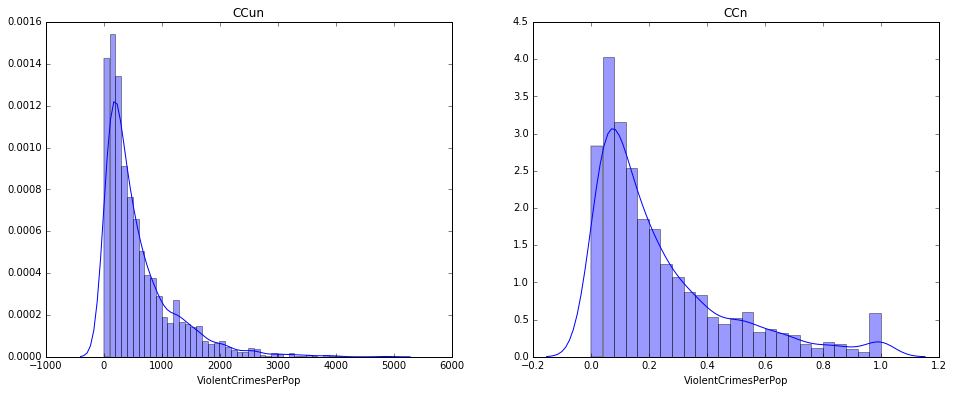

In [14]:
fig, ax =plt.subplots(1,2, figsize=(16,6))

sns.distplot(df_ccun['ViolentCrimesPerPop'], ax=ax[0]).set_title('CCun');
sns.distplot(df_ccn['ViolentCrimesPerPop'], ax=ax[1]).set_title('CCn');

We can see from the distribution of the target attribute that CCn is a little bit different from CCun. Actually, this difference can be explained by the normalization of values out of the the range [-3\*std, 3\*std] to 0 and 1 (see the UCI page: http://archive.ics.uci.edu/ml/datasets/communities+and+crime).
We can notice three aspects about both datasets:

- Deviate from the normal distribution.
- Have positive skewness.
- Show kurtosis.

Let's check the values:

In [90]:
fmt = '{:<15}{:<20}{}'
print(fmt.format('', '====== CCun ======', '====== CCn ====='))
print(fmt.format("Skewness:", df_ccun['ViolentCrimesPerPop'].skew(), 
                 df_ccn['ViolentCrimesPerPop'].skew()))

print(fmt.format("Kurtosis:", df_ccun['ViolentCrimesPerPop'].kurt(), 
                 df_ccn['ViolentCrimesPerPop'].kurt()))

               ====== CCun ======  ====== CCn =====
Skewness:      2.066871070489735   1.522598485536617
Kurtosis:      5.596672551124966   1.8332679528012483


The difference in the value reflects the normalization process apoted for values out of the range [-3\*std, 3\*std].

### 3.1.3 Looking for insights
The pearson correlation between features can give us some insights about their relation. 

#### 3.1.3.1 Heat Map
We first plot the heatmap of the correlation matrix between the features of the dataset. The heatmap can give us a first intuition about the relation between the attributes of the dataset.

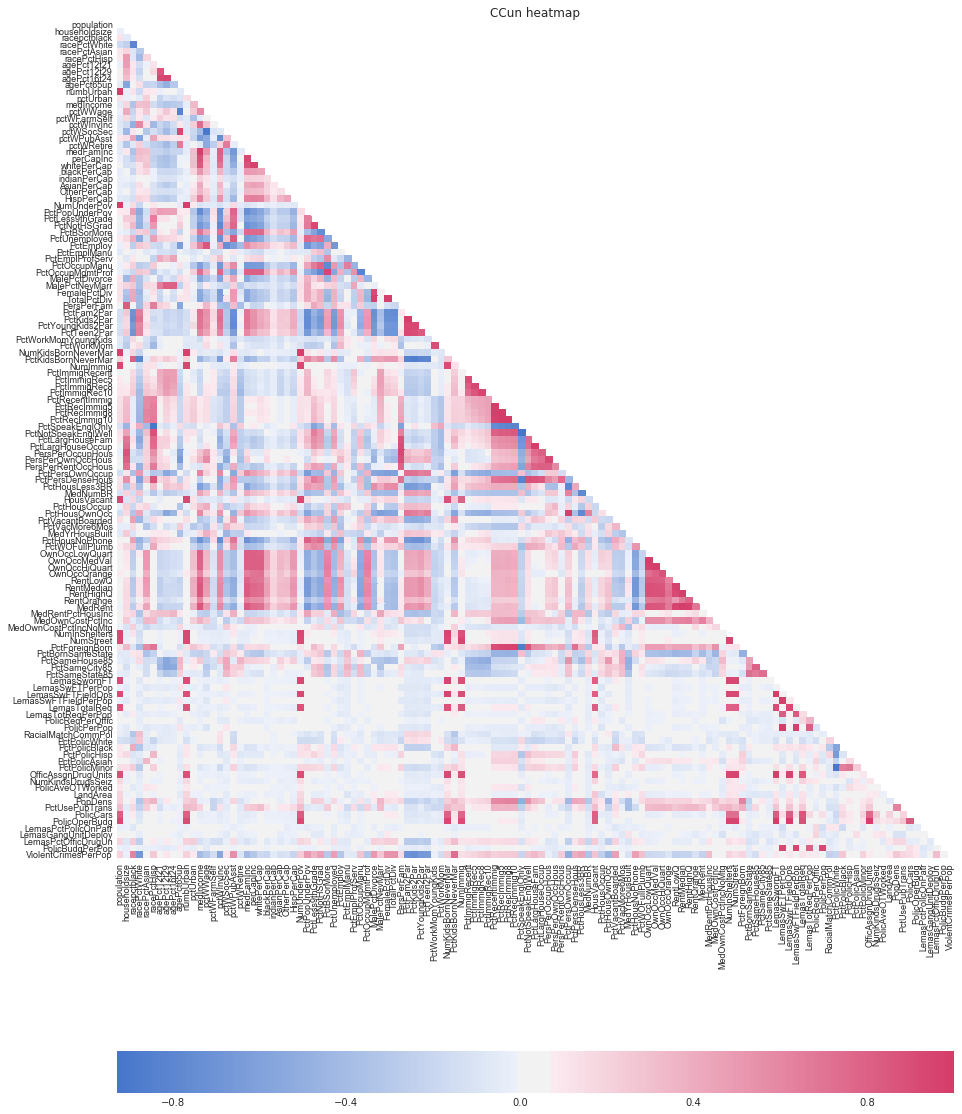

In [92]:
corr_mat_ccun = df_ccun.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_mat_ccun, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 23))

# Use white background for the heatmap
sns.set_style("white")

# Plot a heatmap for the correlation matrix, using only the lower triangle
hm = sns.heatmap(corr_mat_ccun, square=True, mask = mask, cmap = cmap, 
                 cbar_kws={"orientation": "horizontal"}, # Using a horizontal color bar
                 xticklabels=corr_mat_ccun.columns.values, # Using all the labels
                 yticklabels=corr_mat_ccun.columns.values);  
    
# Avoiding overlapped labels
hm.tick_params(labelsize=9)
hm.set_title('CCun heatmap');

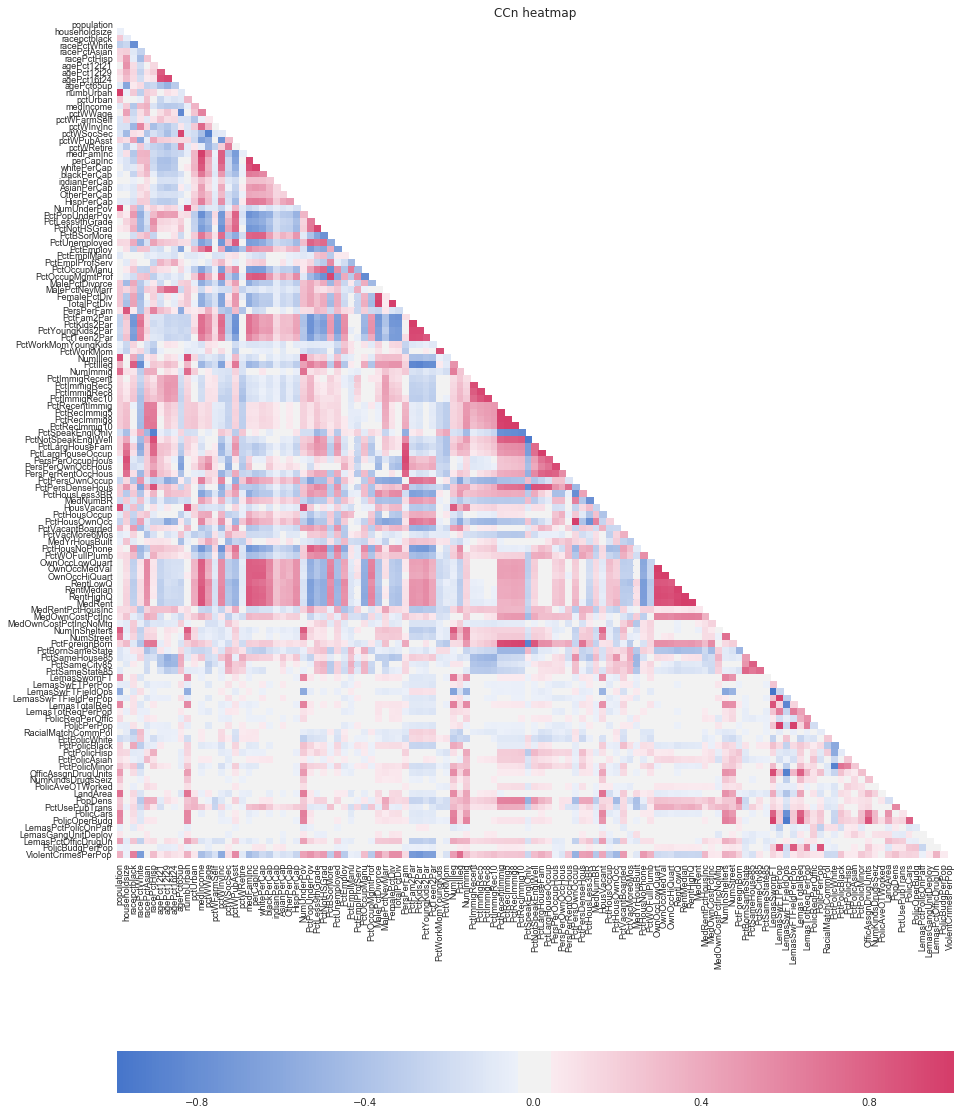

In [93]:
corr_mat_ccn = df_ccn.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_mat_ccn, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 23))

# Use white background for the heatmap
sns.set_style("white")

# Plot a heatmap for the correlation matrix, using only the lower triangle
hm = sns.heatmap(corr_mat_ccn, square=True, mask = mask, cmap = cmap, 
                 cbar_kws={"orientation": "horizontal"}, # Using a horizontal color bar
                 xticklabels=corr_mat_ccn.columns.values, # Using all the labels
                 yticklabels=corr_mat_ccn.columns.values);  
    
# Avoiding overlapped labels
hm.tick_params(labelsize=9)
hm.set_title('CCn heatmap');

#### 3.1.3.2 Focusing on the highly correlated features

We can see some similarities between CCun and CCn. However, due to the number of features, the heatmap is a little bit messy. However, we can see some features with very high postive (red colors) and negative (blue colors) correlation. Next we show the pair of features with correlation less than -0.8 and greater than 0.8.

We start first with the **CCun** dataset:

In [94]:
def get_corr_out_range(corr_mat, left, right):
    """Get the values out of the range (left, right)---values <= left or values >= left

    Parameters
    ==========
    corr_mat: Pandas.DataFrame
        Correlation matrix
    left: double
        Upper bound of the left interval. Values have to be in (-inf, left]
    right: double
        Lower bound of the right interval. Values have to be in [right, inf)
    """
    # Generates a matrix with True in the upper diagonal and False otherwise
    aux = np.triu(np.ones(corr_mat.shape)).astype(bool)
    aux = corr_mat.mask(aux)  # Replace the values indexed by aux by NaN
    aux = aux.stack()  # Select only non-NaN values
    # Return the values outside the range (left, right)
    return aux[aux.le(left) | aux.ge(right)]


high_corr_ccun = get_corr_out_range(corr_mat_ccun, -0.8, 0.8)
fmt = '{:<22}{:<20}{:>5}'
print(fmt.format("Feature 1", "Feature 2", "Corr."))
print("====================================================")
fmt = '{:<22}{:<21}{:>7.4f}'
for i, row in high_corr.iteritems():
    print(fmt.format(i[0], i[1], row))

Feature 1             Feature 2           Corr.
racePctWhite          racepctblack         -0.8039
agePct12t29           agePct12t21           0.8682
agePct16t24           agePct12t21           0.9312
agePct16t24           agePct12t29           0.9462
numbUrban             population            0.9990
pctWWage              agePct65up           -0.8393
pctWSocSec            agePct65up            0.9338
pctWSocSec            pctWWage             -0.9023
medFamInc             medIncome             0.9790
medFamInc             pctWInvInc            0.8034
perCapInc             medIncome             0.8883
perCapInc             medFamInc             0.9336
whitePerCap           medIncome             0.8399
whitePerCap           medFamInc             0.8853
whitePerCap           perCapInc             0.9756
NumUnderPov           population            0.9884
NumUnderPov           numbUrban             0.9864
PctNotHSGrad          PctLess9thGrade       0.9317
PctUnemployed         pctWPubAsst 

We can see some high correlations that we can try to explain by the description of the features:

| Feature 1 | Feature 2 | Corr. | Description |
|-----------|-----------|-------|-------------|
| racePctWhite | racepctblack | -0.8039 | **Distribution of the population in groups**: Given that Caucasian and African American are the two largest ethnic groups, by increasing the percentage of one population the percentage of the other group is reduced|
| agePct12t29 <br> agePct16t24 <br> agePct16t24 <br> PctNotHSGrad <br> PctWorkMom <br> PctImmigRec5 <br> PctImmigRec8 <br> PctImmigRec8 <br> PctImmigRec10 <br> PctImmigRec10 <br> PctRecImmig5 <br> PctRecImmig8 <br> PctRecImmig8 <br> PctRecImmig10 <br> PctRecImmig10 <br> PctRecImmig10 | agePct12t21 <br> agePct12t21 <br> agePct12t29 <br> PctLess9thGrade <br> PctWorkMomYoungKids <br> PctImmigRecent <br> PctImmigRecent <br> PctImmigRec5 <br> PctImmigRec5 <br> PctImmigRec8 <br> PctRecentImmig <br> PctRecentImmig <br> PctRecImmig5 <br> PctRecentImmig <br> PctRecImmig5 <br> PctRecImmig8 | 0.8682 <br> 0.9312 <br> 0.9462 <br> 0.9317 <br> 0.8992 <br> 0.9022 <br> 0.8252 <br> 0.9369 <br> 0.8647 <br> 0.9412 <br> 0.9899 <br> 0.9786 <br> 0.9938 <br> 0.9662 <br> 0.9851 <br> 0.9952 | **Shared interval have high correlation** |
| *numbUrban* | *population* | 0.9990 | **Most of the population lives in areas classified as urban** |
| pctWWage <br> pctWSocSec <br> pctWSocSec | agePct65up <br> agePct65up <br> pctWWage | -0.8393 <br> 0.9338 <br> -0.9023 |  **Elderly people usually has no wage and receive social security** |
| medFamInc <BR> perCapInc <BR> perCapInc <BR> TotalPctDiv <BR> TotalPctDiv <BR> PctKidsBornNeverMar <BR> PctKidsBornNeverMar <BR> PctKidsBornNeverMar <BR> PctLargHouseFam <BR> PctLargHouseOccup <BR> PersPerOccupHous <BR> PersPerOccupHous <BR> PctHousOwnOcc <BR> OwnOccMedVal <BR> OwnOccHiQuart <BR> OwnOccHiQuart <BR> OwnOccQrange <BR> RentMedian <BR> RentHighQ <BR> RentHighQ <BR> MedRent <BR> MedRent <BR> MedRent <BR> PctForeignBorn <BR> PctForeignBorn <BR> PctForeignBorn <BR> PctForeignBorn <BR> PctSameCity85 <BR> LemasSwFTFieldOps <BR> LemasSwFTFieldPerPop <BR> PolicPerPop <BR> PolicPerPop <BR> PersPerOwnOccHous <BR> PersPerRentOccHous <BR> PersPerOwnOccHous <BR> PersPerRentOccHous <BR> PctPersDenseHous <BR> PctPersDenseHous | medIncome <BR> medIncome <BR> medFamInc <BR> MalePctDivorce <BR> FemalePctDiv <BR> PctFam2Par <BR> PctKids2Par <BR> PctYoungKids2Par <BR> PersPerFam <BR> PctLargHouseFam <BR> householdsize <BR> PctLargHouseOccup <BR> PctPersOwnOccup <BR> OwnOccLowQuart <BR> OwnOccLowQuart <BR> OwnOccMedVal <BR> OwnOccHiQuart <BR> RentLowQ <BR> RentLowQ <BR> RentMedian <BR> RentLowQ <BR> RentMedian <BR> RentHighQ <BR> PctRecentImmig <BR> PctRecImmig5 <BR> PctRecImmig8 <BR> PctRecImmig10 <BR> PctSameHouse85 <BR> LemasSwornFT <BR> LemasSwFTPerPop <BR> LemasSwFTPerPop <BR> LemasSwFTFieldPerPop <BR> PersPerOccupHous <BR> PersPerOccupHous <BR> householdsize <BR> PctLargHouseOccup <BR> PctLargHouseOccup <BR> PctLargHouseFam | 0.9790 <BR> 0.8883 <BR> 0.9336 <BR> 0.9753 <BR> 0.9834 <BR> -0.8390 <BR> -0.8613 <BR> -0.8108 <BR> 0.8807 <BR> 0.9862 <BR> 0.8788 <BR> 0.8176 <BR> 0.9822 <BR> 0.9915 <BR> 0.9637 <BR> 0.9849 <BR> 0.8863 <BR> 0.9627 <BR> 0.9282 <BR> 0.9799 <BR> 0.9488 <BR> 0.9881 <BR> 0.9773 <BR> 0.9140 <BR> 0.9336 <BR> 0.9492 <BR> 0.9591 <BR> 0.8033 <BR> 0.9981 <BR> 0.9785 <BR> 1.0000 <BR> 0.9785 <BR> 0.9262 <BR> 0.8060 <BR> 0.8129 <BR> 0.8147 <BR> 0.8483 <BR> 0.8751 | **Features with a direct relation between each other**---e.g., if the median income of the families is high, the median income of the households will be high |  
| medFamInc | pctWInvInc | 0.8034 | **Investors are those with spare income** |
| whitePerCap <BR> whitePerCap <BR> whitePerCap | medIncome <BR> medFamInc <BR> perCapInc | 0.8399 <BR> 0.8853 <BR> 0.9756 | **Caucasians possibly earn more than other ethnic groups** |
| PctUnemployed | pctWPubAsst | 0.8331 | **Usually unemplyed receive public assistance** |
| PctEmploy | pctWWage | 0.8609 | **Having a job gives you a salary** |
| PctOccupMgmtProf <BR> PctOccupMgmtProf | perCapInc <BR> PctBSorMore | 0.8164 <BR> 0.9512 | **Management and professional occupations pay more and usually demand bachelors degree or higher education** | 
| PctOccupMgmtProf | whitePerCap | 0.8043 | **Management and professional occupations are usually given to caucasians** |
| PctOccupMgmtProf | PctOccupManu | -0.8175 | **Complementary features (if one value is reduced, the other is increased and vice versa)** |
| MalePctNevMarr | agePct12t29 | 0.8003 | **Men usually do not get married before their 30th aniversary** |
| FemalePctDiv | MalePctDivorce | 0.9210 | **Heterosexual divorces are more usual** |
| PersPerFam <BR> PersPerOccupHous <BR> PctLargHouseOccup | householdsize <BR> PersPerFam <BR> PersPerFam | 0.8343 <BR> 0.9371 <BR> 0.9030 | **Families live in the same house** |
| PctKids2Par <BR> PctYoungKids2Par <BR> PctYoungKids2Par <BR> PctTeen2Par <BR> PctTeen2Par <BR> PctTeen2Par | PctFam2Par <BR> PctFam2Par <BR> PctKids2Par <BR> PctFam2Par <BR> PctKids2Par <BR> PctYoungKids2Par | 0.9858 <BR> 0.9366 <BR> 0.9315 <BR> 0.9181 <BR> 0.9084 <BR> 0.8398 |  **Kids and teenagers usually live with both parents** |
| NumUnderPov <BR> NumUnderPov <BR> NumImmig <BR> NumImmig <BR> NumImmig <BR> NumImmig <BR> NumKidsBornNeverMar <BR> NumKidsBornNeverMar <BR> NumKidsBornNeverMar <BR> HousVacant <BR> HousVacant <BR> HousVacant <BR> HousVacant <BR> NumInShelters <BR> NumInShelters <BR> NumInShelters <BR> NumInShelters <BR> NumInShelters <BR> NumInShelters <BR> NumStreet <BR> NumStreet <BR> NumStreet <BR> NumStreet <BR> NumStreet <BR> NumStreet <BR> LemasSwornFT <BR> LemasSwornFT <BR> LemasSwornFT <BR> LemasSwornFT <BR> LemasSwornFT <BR> LemasSwornFT <BR> LemasSwornFT <BR> LemasSwornFT <BR> LemasSwFTFieldOps <BR> LemasSwFTFieldOps <BR> LemasSwFTFieldOps <BR> LemasSwFTFieldOps <BR> LemasSwFTFieldOps <BR> LemasSwFTFieldOps <BR> LemasSwFTFieldOps <BR> LemasSwFTFieldOps <BR> LemasTotalReq <BR> LemasTotalReq <BR> LemasTotalReq <BR> LemasTotalReq <BR> LemasTotalReq <BR> LemasTotalReq <BR> LemasTotalReq <BR> LemasTotalReq <BR> LemasTotalReq <BR> LemasTotalReq <BR> OfficAssgnDrugUnits <BR> OfficAssgnDrugUnits <BR> OfficAssgnDrugUnits <BR> OfficAssgnDrugUnits <BR> OfficAssgnDrugUnits <BR> OfficAssgnDrugUnits <BR> OfficAssgnDrugUnits <BR> OfficAssgnDrugUnits <BR> OfficAssgnDrugUnits <BR> OfficAssgnDrugUnits <BR> PolicCars <BR> PolicCars <BR> PolicCars <BR> PolicCars <BR> PolicCars <BR> PolicCars <BR> PolicCars <BR> PolicCars <BR> PolicOperBudg <BR> PolicOperBudg <BR> PolicOperBudg <BR> PolicOperBudg <BR> PolicOperBudg <BR> PolicOperBudg <BR> PolicOperBudg <BR> PolicOperBudg <BR> PolicOperBudg <BR> PolicOperBudg <BR> PolicOperBudg <BR> PolicOperBudg <BR> PolicOperBudg | population <BR> numbUrban <BR> population <BR> numbUrban <BR> NumUnderPov <BR> NumKidsBornNeverMar <BR> population <BR> numbUrban <BR> NumUnderPov <BR> population <BR> numbUrban <BR> NumUnderPov <BR> NumKidsBornNeverMar <BR> population <BR> numbUrban <BR> NumUnderPov <BR> NumKidsBornNeverMar <BR> NumImmig <BR> HousVacant <BR> population <BR> numbUrban <BR> NumUnderPov <BR> NumKidsBornNeverMar <BR> NumImmig <BR> NumInShelters <BR> population <BR> numbUrban <BR> NumUnderPov <BR> NumKidsBornNeverMar <BR> NumImmig <BR> HousVacant <BR> NumInShelters <BR> NumStreet <BR> population <BR> numbUrban <BR> NumUnderPov <BR> NumKidsBornNeverMar <BR> NumImmig <BR> HousVacant <BR> NumInShelters <BR> NumStreet <BR> population <BR> numbUrban <BR> NumUnderPov <BR> NumKidsBornNeverMar <BR> NumImmig <BR> HousVacant <BR> NumInShelters <BR> NumStreet <BR> LemasSwornFT <BR> LemasSwFTFieldOps <BR> population <BR> numbUrban <BR> NumUnderPov <BR> NumKidsBornNeverMar <BR> NumImmig <BR> NumInShelters <BR> NumStreet <BR> LemasSwornFT <BR> LemasSwFTFieldOps <BR> LemasTotalReq <BR> population <BR> numbUrban <BR> NumUnderPov <BR> NumKidsBornNeverMar <BR> HousVacant <BR> LemasSwornFT <BR> LemasSwFTFieldOps <BR> LemasTotalReq <BR> population <BR> numbUrban <BR> NumUnderPov <BR> NumKidsBornNeverMar <BR> NumImmig <BR> HousVacant <BR> NumInShelters <BR> NumStreet <BR> LemasSwornFT <BR> LemasSwFTFieldOps <BR> LemasTotalReq <BR> OfficAssgnDrugUnits <BR> PolicCars | 0.9884 <BR> 0.9864 <BR> 0.9370 <BR> 0.9349 <BR> 0.9305 <BR> 0.9153 <BR> 0.9692 <BR> 0.9672 <BR> 0.9828 <BR> 0.9251 <BR> 0.9245 <BR> 0.9185 <BR> 0.8897 <BR> 0.9303 <BR> 0.9282 <BR> 0.9269 <BR> 0.9416 <BR> 0.8889 <BR> 0.8337 <BR> 0.9210 <BR> 0.9182 <BR> 0.9162 <BR> 0.9217 <BR> 0.9353 <BR> 0.9499 <BR> 0.9164 <BR> 0.9119 <BR> 0.9274 <BR> 0.9505 <BR> 0.9014 <BR> 0.8147 <BR> 0.9347 <BR> 0.9283 <BR> 0.9139 <BR> 0.9094 <BR> 0.9250 <BR> 0.9498 <BR> 0.8981 <BR> 0.8150 <BR> 0.9296 <BR> 0.9210 <BR> 0.8670 <BR> 0.8627 <BR> 0.8752 <BR> 0.8828 <BR> 0.8379 <BR> 0.8228 <BR> 0.8006 <BR> 0.8112 <BR> 0.9127 <BR> 0.9200 <BR> 0.8874 <BR> 0.8831 <BR> 0.8992 <BR> 0.9261 <BR> 0.8955 <BR> 0.9365 <BR> 0.9440 <BR> 0.9790 <BR> 0.9750 <BR> 0.8487 <BR> 0.8214 <BR> 0.8170 <BR> 0.8278 <BR> 0.8012 <BR> 0.8083 <BR> 0.8327 <BR> 0.8260 <BR> 0.8590 <BR> 0.9180 <BR> 0.9135 <BR> 0.9236 <BR> 0.9393 <BR> 0.9130 <BR> 0.8041 <BR> 0.9406 <BR> 0.9461 <BR> 0.9916 <BR> 0.9854 <BR> 0.8941 <BR> 0.9774 <BR> 0.8351 | **The number of people under the poverty level, the number of Kids born to never married parents, the number of vacant households, the number of immigrants, the number of people in homeless shelters, the number of homeless people counted in the street, the number of sworn full time police officers, the number of sworn full time police officers in field operations (on the street as opposed to administrative etc), total requests for police, number of officers assigned to special drug units, the number of police cars and the police operating budget reflect the size of the population** |
| PctKidsBornNeverMar <BR> NumImmig | racepctblack <BR> NumKidsBornNeverMar | 0.8045 <BR> 0.9153 | **African american and immigrand parents are more prone to not get married** |
| PctSpeakEnglOnly <BR> PctSpeakEnglOnly <BR> PctNotSpeakEnglWell <BR> PctNotSpeakEnglWell <BR> PctNotSpeakEnglWell <BR> PctNotSpeakEnglWell <BR> PctForeignBorn <BR> PctForeignBorn | racePctHisp <BR> PctRecImmig10 <BR> racePctHisp <BR> PctRecImmig5 <BR> PctRecImmig8 <BR> PctRecImmig10 <BR> PctSpeakEnglOnly <BR> PctNotSpeakEnglWell | -0.9143 <BR> -0.8126 <BR> 0.8923 <BR> 0.8286 <BR> 0.8333 <BR> 0.8543 <BR> -0.8641 <BR> 0.8594 | **People with Hispanic heritage and immigrants usually do not speak English very well and/or speak other language** |
| PctNotSpeakEnglWell | PctSpeakEnglOnly | -0.9283 |  **People who do not speak english very well speak other language** |
| PersPerOwnOccHous | PersPerFam | 0.8979 | **Families tend to live their own house** |
| PctPersDenseHous <BR> PctPersDenseHous | racePctHisp <BR> PctNotSpeakEnglWell | 0.8643 <BR> 0.8929 | **People with hispanic heritage and/or who do not speak English well tend to live in densely populated houses** |
| PctPersDenseHous | PctSpeakEnglOnly | -0.8155 | **People who speak only English tend to live in less dense houses** |
| PctHousNoPhone | PctPopUnderPov | 0.8108 | **People under the poverty level usually do not have phone at home** | 
| OwnOccLowQuart <BR> OwnOccMedVal <BR> OwnOccMedVal <BR> OwnOccMedVal <BR> OwnOccHiQuart <BR> OwnOccHiQuart <BR> OwnOccHiQuart | medFamInc <BR> medFamInc <BR> perCapInc <BR> whitePerCap <BR> medFamInc <BR> perCapInc <BR> whitePerCap | 0.8125 <BR> 0.8096 <BR> 0.8083 <BR> 0.8012 <BR> 0.8044 <BR> 0.8121 <BR> 0.8125 | **The number of owner occupied houses reflect the income of the population (and Caucasians)** |
| RentLowQ <BR> RentLowQ <BR> RentLowQ <BR> RentMedian <BR> RentMedian <BR> RentMedian <BR> RentHighQ <BR> RentHighQ <BR> RentHighQ <BR> MedRent <BR> MedRent <BR> MedRent | OwnOccLowQuart <BR> OwnOccMedVal <BR> OwnOccHiQuart <BR> OwnOccLowQuart <BR> OwnOccMedVal <BR> OwnOccHiQuart <BR> OwnOccLowQuart <BR> OwnOccMedVal <BR> OwnOccHiQuart <BR> OwnOccLowQuart <BR> OwnOccMedVal <BR> OwnOccHiQuart | 0.8365 <BR> 0.8225 <BR> 0.8088 <BR> 0.8923 <BR> 0.8834 <BR> 0.8709 <BR> 0.8886 <BR> 0.8850 <BR> 0.8834 <BR> 0.8646 <BR> 0.8558 <BR> 0.8458 | **The value of the rent payed in rental houses is proportional to the number of owner occupied houses (which may be related to relation with the income of the population)** |
| MedRent <BR> MedRent <BR> RentLowQ <BR> RentMedian <BR> RentMedian <BR> RentHighQ <BR> RentHighQ | medIncome <BR> medFamInc <BR> medIncome <BR> medIncome <BR> medFamInc <BR> medIncome <BR> medFamInc | 0.8569 <BR> 0.8345 <BR> 0.8050 <BR> 0.8526 <BR> 0.8381 <BR> 0.8433 <BR> 0.8314 | **The rent value reflects the income of the population / families** | 
| LemasTotReqPerPop <BR> LemasTotReqPerPop <BR> PolicPerPop | LemasSwFTPerPop <BR> LemasSwFTFieldPerPop <BR> LemasTotReqPerPop | 0.8244 <BR> 0.8463 <BR> 0.8244 | **The number of police officers is proportional to the number of requests for police** |
| PctPolicMinor | PctPolicWhite | -0.9071 | **More Caucasian police infer in less police that are minority of any kind** |
| PolicBudgPerPop  <BR> PolicBudgPerPop  <BR> PolicBudgPerPop  <BR> PolicBudgPerPop | LemasSwFTPerPop  <BR>  LemasSwFTFieldPerPop  <BR>  LemasTotReqPerPop  <BR>  PolicPerPop | 0.9270 <BR>  0.9356 <BR>  0.8123 <BR>  0.9270 | **The police operating budget reflects the number of police officers/requests** |

Now we will check if there are pairs of features highly correlated in the **CCn** that did not appear in the **CCun** dataset:

In [48]:
fmt = '{:<22}{:<20}{:>5}'
print(fmt.format("Feature 1", "Feature 2", "Corr."))
print("====================================================")
fmt = '{:<22}{:<21}{:>7.4f}'

high_corr_ccn = get_corr_out_range(corr_mat_ccn, -0.8, 0.8)
for key in high_corr_ccn.keys():
    if key not in high_corr_ccun.keys():
        print(fmt.format(key[0], key[1], high_corr_ccn[key]))


Feature 1             Feature 2           Corr.
perCapInc             pctWInvInc            0.8116
NumIlleg              population            0.8852
NumIlleg              numbUrban             0.8767
NumIlleg              NumUnderPov           0.9406
PctIlleg              racepctblack          0.8107
PctIlleg              racePctWhite         -0.8035
PctIlleg              PctFam2Par           -0.8432
PctIlleg              PctKids2Par          -0.8702
PctIlleg              PctYoungKids2Par     -0.8123
PctSpeakEnglOnly      PctRecImmig5         -0.8000
PctSpeakEnglOnly      PctRecImmig8         -0.8148
HousVacant            NumIlleg              0.8227
NumInShelters         NumIlleg              0.8240


As you can see, there are some pairs of features highly correlated in the **CCn** but not in the **CCun**. Again, we can try to explain by the description of the features:

| Feature 1 | Feature 2 | Corr. | Description |
|-----------|-----------|-------|-------------|
| perCapInc | pctWInvInc | 0.8116 | **Higher income imply in more investors** |
| NumIlleg  <BR> NumIlleg  <BR> NumIlleg  <BR> NumInShelters  <BR> HousVacant | population  <BR>  numbUrban  <BR>  NumUnderPov  <BR>  NumIlleg  <BR>  NumIlleg | 0.8852 <BR>  0.8767 <BR>  0.9406 <BR>  0.8240 <BR>  0.8227 | **The number of kids born to never married reflect the size of the population** |
| PctIlleg  <BR> PctIlleg | racepctblack  <BR>  racePctWhite | 0.8107 <BR>  -0.8035 | **African American parents are more prone to not get married** |
| PctIlleg  <BR> PctIlleg  <BR> PctIlleg | PctFam2Par  <BR>  PctKids2Par  <BR>  PctYoungKids2Par | -0.8432 <BR>  -0.8702 <BR>  -0.8123 | **Features with a direct relation between each other** |
| PctSpeakEnglOnly  <BR> PctSpeakEnglOnly | PctRecImmig5  <BR>  PctRecImmig8 | -0.8000 <BR>  -0.8148 | **Immigrants usually speak other language** |
